## Contents
1) Importing Libraries & Data
2) Data Wrangling
3) Consistency Check
4) Choropleth Map Creations
5) Result Analysis of Maps

### 1) Importing Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Propt for matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

state_geo=r'C:\Users\Drew\Superstore\02 Data\Prepared Data\us_states.json'

In [4]:
# To view JSON file here

f=open(r'C:\Users\Drew\Superstore\02 Data\Prepared Data\us_states.json',)

# Return JSON object as a dictionary

data=json.load(f)

# Iterating through JSON List

for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Creating Path

path=r'C:\Users\Drew\Superstore'

In [6]:
# Importing Dataframe

df_sales=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','product_sales_cleaned.csv'))

In [7]:
df_sales.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer


In [8]:
df_sales.shape

(9993, 21)

### 2) Data Wrangling

In [13]:
# Creating necessary columns subset

nec_columns=["state",
            "sales",
            "profit",
            "quantity",
             "total_orders"]

In [14]:
# Creating Subset from only newly created dummy columns

state_rec=df_sales[nec_columns]

In [37]:
# Creating profit percentage column for order
state_rec.loc['profit_percentage'] = (state_rec['profit'] / state_rec['sales']) * 100
state_rec.loc['profit_percentage'] = state_rec['profit_percentage'].round(2)

In [38]:
state_rec.head()

,state,sales,profit,quantity,total_orders,profit_percentage
0,Kentucky,261.96,41.91,2.0,5.0,16.00
1,Kentucky,731.94,219.58,3.0,5.0,30.00
2,California,14.62,6.87,2.0,9.0,46.99
3,Florida,957.58,-383.03,5.0,15.0,-40.00
4,Florida,22.37,2.52,2.0,15.0,11.27


In [51]:
state_rec.columns

Index(['state', 'sales', 'profit', 'quantity', 'total_orders',
       'profit_percentage'],
      dtype='object')

### 3) Consistency Checks

In [56]:
# Checking for missing values

state_rec.isnull().sum()

state                1
sales                1
profit               1
quantity             1
total_orders         1
profit_percentage    1
dtype: int64

In [61]:
# Dropping NaN row that was added due to new column of profit_percentage

state_rec.dropna(inplace=True)

C:\Users\Drew\AppData\Local\Temp\ipykernel_11272\2982168439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec.dropna(inplace=True)


In [63]:
# Double checking missing values
state_rec.isnull().sum()

state                0
sales                0
profit               0
quantity             0
total_orders         0
profit_percentage    0
dtype: int64

In [64]:
state_rec.head()

,state,sales,profit,quantity,total_orders,profit_percentage
0,Kentucky,261.96,41.91,2.0,5.0,16.00
1,Kentucky,731.94,219.58,3.0,5.0,30.00
2,California,14.62,6.87,2.0,9.0,46.99
3,Florida,957.58,-383.03,5.0,15.0,-40.00
4,Florida,22.37,2.52,2.0,15.0,11.27


In [65]:
# Checking for duplciates

dups=state_rec.duplicated()

In [66]:
dups.shape

(9993,)

### no duplicates found

<Axes: xlabel='sales', ylabel='Count'>

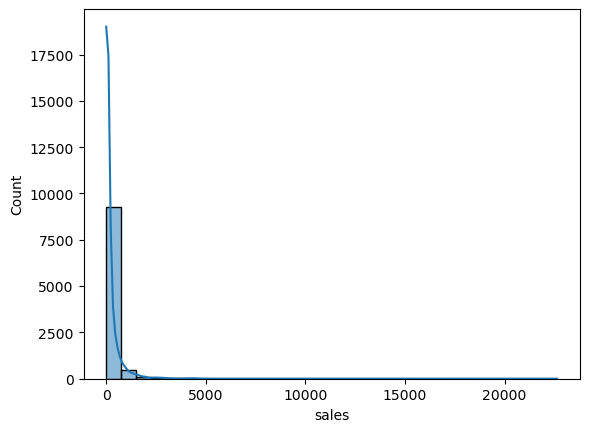

In [39]:
# Creating histplot for sales data

sns.histplot(state_rec['sales'],bins=30,kde=True)

<Axes: xlabel='profit', ylabel='Count'>

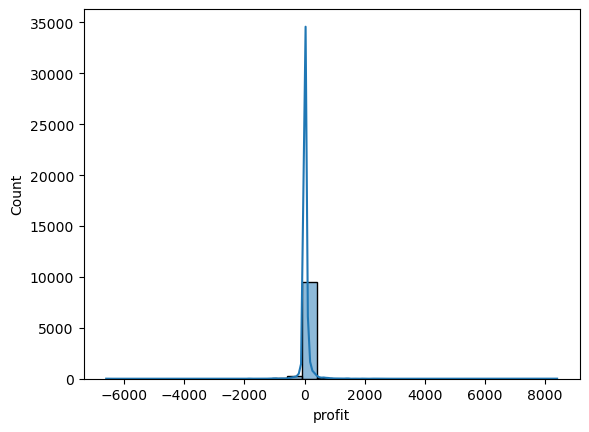

In [47]:
# Creating histplot for profit data

sns.histplot(state_rec['profit'],bins=30,kde=True)

<Axes: xlabel='quantity', ylabel='Count'>

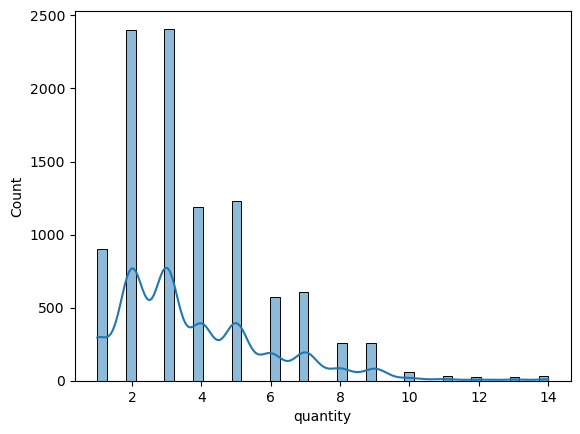

In [45]:
# Creating histplot for quantity data

sns.histplot(state_rec['quantity'],bins='auto',kde=True)

<Axes: xlabel='total_orders', ylabel='Count'>

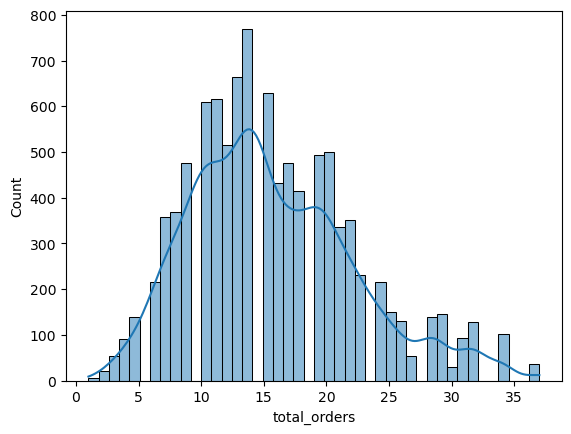

In [68]:
# Creating histplot for total_orders data

sns.histplot(state_rec['total_orders'],bins='auto',kde=True)

<Axes: xlabel='profit_percentage', ylabel='Count'>

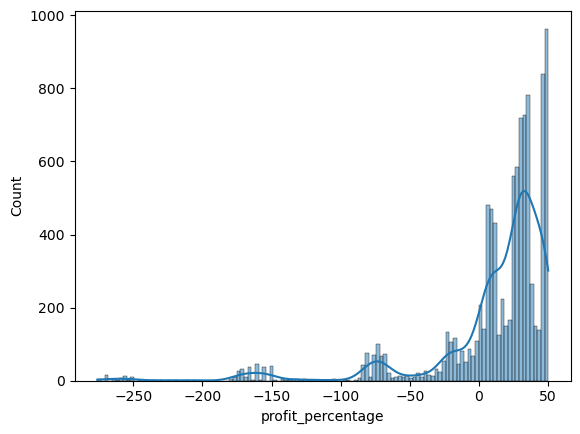

In [69]:
# Creating histplot for profit_percentage data

sns.histplot(state_rec['profit_percentage'],bins='auto',kde=True)

## 4) Plotting Choropleth

In [95]:
# Aggregating sales and profit for each state to get state's overall profit percentage
profit_percentage_by_state = state_rec.groupby('state').agg({'sales': 'sum', 'profit': 'sum'}).reset_index()

# Creating subset to map states based on the profit percentage per state to see which state bring in money to those losing money
profit_percentage_by_state['profit_per_state_percentage'] = (profit_percentage_by_state['profit'] / profit_percentage_by_state['sales']) * 100

In [123]:
# Setting up folium map at highi-level zoom
profit_percentage_per_state=folium.Map(location=[200,0],zoom_start=1.5)

# Choropleth map creation for state's overall profit percentage

folium.Choropleth(
    geo_data=state_geo,
    data=profit_percentage_by_state,
    columns=['state','profit_per_state_percentage'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',fill_opacity=0.6,line_opacity=0.1,
    legend_name='Profit Percentage').add_to(profit_percentage_per_state)
folium.LayerControl().add_to(profit_percentage_per_state)

profit_percentage_per_state                                           

In [124]:
# Saving above map based on profit percentage per state

profit_percentage_per_state.save(r'C:\Users\Drew\Superstore\04 Analysis\Visualizations\profit_percentage_per_state.html')

In [102]:
# Subset to group states by profit using subset created for necessary columns
profit_by_state=state_rec.groupby('state').agg({'profit': 'sum'}).reset_index()

In [121]:
# Setting up folium map at highi-level zoom
profit_per_state=folium.Map(location=[200,0],zoom_start=1.5)

# Choropleth map creation of states per their profit sum

folium.Choropleth(
    geo_data=state_geo,
    data=profit_by_state,
    columns=['state','profit'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',fill_opacity=0.6,line_opacity=0.1,
    legend_name='Profit').add_to(profit_per_state)
folium.LayerControl().add_to(profit_per_state)

profit_per_state

In [122]:
# Saving above map based on profit per state

profit_per_state.save(r'C:\Users\Drew\Superstore\04 Analysis\Visualizations\profit_per_state.html')

In [106]:
# Subset to group states by sales using subset created for necessary columns
sales_by_state=state_rec.groupby('state').agg({'sales': 'sum'}).reset_index()

In [119]:
# Setting up folium map at highi-level zoom
sales_per_state=folium.Map(location=[200,0],zoom_start=1.5)

# Choropleth map creation of states per their sale sum

folium.Choropleth(
    geo_data=state_geo,
    data=sales_by_state,
    columns=['state','sales'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',fill_opacity=0.6,line_opacity=0.1,
    legend_name='Sales').add_to(sales_per_state)
folium.LayerControl().add_to(sales_per_state)

sales_per_state

In [120]:
# Saving above map based on sales per state

sales_per_state.save(r'C:\Users\Drew\Superstore\04 Analysis\Visualizations\sales_per_state.html')

In [109]:
# Subset to group states by sales using subset created for necessary columns
total_orders_by_state=state_rec.groupby('state').agg({'total_orders': 'sum'}).reset_index()

In [116]:
# Setting up folium map at highi-level zoom
total_orders_per_state=folium.Map(location=[200,0],zoom_start=1.5)

# Choropleth map creation of states per the sum of their total orders placed

folium.Choropleth(
    geo_data=state_geo,
    data=total_orders_by_state,
    columns=['state','total_orders'],
    key_on='feature.properties.name',
    fill_color='YlGn',fill_opacity=0.6,line_opacity=0.1,
    legend_name='Total Orders').add_to(total_orders_per_state)
folium.LayerControl().add_to(total_orders_per_state)

total_orders_per_state

In [118]:
# Saving above map based on total orders per state

total_orders_per_state.save(r'C:\Users\Drew\Superstore\04 Analysis\Visualizations\total_orders_per_state.html')

## 5) Choropleth Result Analysis

### Profit Percentage (Map 1): This map shows state's performance based on the profit relative to the state's sales. Through this, we can see just how much of a profit that state is yielding or how much it is losing. This map is aimed to help directly answer the question of which regions are pferming well and which are struggling in terms of profit margins.
### Profit (Map 2): This map shows the sum profit or loss per state and highlights those states which generate the most profit and is a compliment map to the previous map 1. 
### Sales (map 3): This map shows the total sales per state and indicates which states result with the highest sales volume. While sales do not represent those with the highest profits as this can been seen when comparing map 2 and 3 where sales are high in some states that have low or negative profits.
### Total Orders (Map 4): This map shows the insight into the volume of orders placed by customers rather than the sales and profit shown before. This map aims to help show those states with the most customer activity by customer orders.

### Current Question: Which regions have the highest and lowest performing sales?
### Answer: Highest Performing Regions: California and New York show to be the highest profitable and sales result states as they appear green in all maps and show a strong performance across the board. Therefore, we can say that California and New York are crucial markets for the company. The lowest performing states, Texas, Illinois, Ohio, and Pennsylvania, show a consistent result of negative profits and sales despite having a decent number of order flowing through some of the states. 

### Current Question: Which regions is the company’s primary market base located?
### Answer: The west coast,specifically California, and the Northeast region of New York appear to be the primary market areas for the company's best revenue to be generated. These regions appear to show the decent customer activity with orders. However, based on the profit percentage map, the midwest has anumber of potential markets that could benefit from greater marketing efforts with more upper northeast regions doing the same.

### Current Question: What are the purchasing patterns of buyer behavior segments and what pricing strategies can be implemented to maximize profit while maintaining customer satisfaction?
### Answer: We can see that areas, such as Texas, show higher customer order activity but see some of the least profit in sales generaeted. We can see that pricing strategies, the cost of products, or products in general are not attracting customer interest and have cost the company too much revenue. We can see that customer activity in states, such as California, are very receptive to products and pricing. In the midwest, we can see that there are mixed results from customers, but do see potential if preference and better pricing and marketing strategies can be nailed down to better encourage customer engagement.

### New Questions for further insight gathering.
1) What products are contributing to the highest sales in the midwest and northeast regions to help entice customer purchases?
2) What products are performing the worst in low performing states so they can be removed to focus on customer preferred high sellers?